In [1]:
#import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [3]:
# load the test and train dataset
file1='data_train.csv'
file2='data_test.csv'
df1=pd.read_csv(file1,na_values='NA')
df2=pd.read_csv(file2,na_values='NA')

In [4]:
df1.head()

,SetID,Time of Application,State,Monthly Net Income,Paycheck Net Income,Rent or Own,Months at Residence,Bank Account Months,Pay Cycle,Loan Amount,Loan Funded Date,Loan Due Date,First Payment Default
0,436,2018-03-28T17:27:35Z,CA,2000.0,2000.0,R,12,6,Monthly,300.00,2018-03-28,2018-04-11,False
1,615,2018-03-23T13:19:32Z,TX,3500.0,3500.0,R,60,60,Monthly,641.91,2018-03-23,2018-04-06,False
2,1251,2018-02-28T12:04:56Z,CA,3000.0,3000.0,R,0,6,Monthly,117.65,2018-02-28,2018-03-30,True
3,440,2018-03-28T15:47:59Z,CA,1500.0,1500.0,R,12,6,Monthly,117.65,2018-03-28,2018-04-28,False
4,1692,2018-02-13T04:36:00Z,CA,2392.0,598.0,R,130,36,Weekly,300.00,2018-02-13,2018-02-23,False


In [10]:
df1.shape

(1600, 13)

In [15]:
df1.dtypes

SetID                      int64
Time of Application       object
State                     object
Monthly Net Income       float64
Paycheck Net Income      float64
Rent or Own               object
Months at Residence        int64
Bank Account Months        int64
Pay Cycle                 object
Loan Amount              float64
Loan Funded Date          object
Loan Due Date             object
First Payment Default       bool
dtype: object

In [5]:
df2.head()

,SetID,Time of Application,State,Monthly Net Income,Paycheck Net Income,Rent or Own,Months at Residence,Bank Account Months,Pay Cycle,Loan Amount,Loan Funded Date,Loan Due Date,First Payment Default
0,1,2018-04-09T23:25:18Z,CA,1894.0,947.0,R,8,30,BiWeekly,300.00,2018-04-10,2018-04-20,NaN
1,4,2018-04-09T20:34:56Z,TX,5000.0,5000.0,O,36,36,Monthly,642.46,2018-04-10,2018-04-27,NaN
2,14,2018-04-09T17:41:37Z,TX,2500.0,2500.0,O,108,6,Monthly,644.24,2018-04-09,2018-05-10,NaN
3,19,2018-04-09T16:33:35Z,CA,2902.0,1451.0,R,48,36,BiWeekly,300.00,2018-04-09,2018-04-20,NaN
4,28,2018-04-09T14:51:15Z,CA,5000.0,5000.0,R,12,12,Monthly,235.30,2018-04-09,2018-04-30,NaN


In [12]:
df2.shape

(400, 13)

In [14]:
df2.dtypes

SetID                      int64
Time of Application       object
State                     object
Monthly Net Income       float64
Paycheck Net Income      float64
Rent or Own               object
Months at Residence        int64
Bank Account Months        int64
Pay Cycle                 object
Loan Amount              float64
Loan Funded Date          object
Loan Due Date             object
First Payment Default    float64
dtype: object

In [16]:
# combine train and test dataframes
df=pd.concat([df1,df2],axis=0)

In [17]:
# let see the combine dataframe
df.head()

,SetID,Time of Application,State,Monthly Net Income,Paycheck Net Income,Rent or Own,Months at Residence,Bank Account Months,Pay Cycle,Loan Amount,Loan Funded Date,Loan Due Date,First Payment Default
0,436,2018-03-28T17:27:35Z,CA,2000.0,2000.0,R,12,6,Monthly,300.00,2018-03-28,2018-04-11,0.0
1,615,2018-03-23T13:19:32Z,TX,3500.0,3500.0,R,60,60,Monthly,641.91,2018-03-23,2018-04-06,0.0
2,1251,2018-02-28T12:04:56Z,CA,3000.0,3000.0,R,0,6,Monthly,117.65,2018-02-28,2018-03-30,1.0
3,440,2018-03-28T15:47:59Z,CA,1500.0,1500.0,R,12,6,Monthly,117.65,2018-03-28,2018-04-28,0.0
4,1692,2018-02-13T04:36:00Z,CA,2392.0,598.0,R,130,36,Weekly,300.00,2018-02-13,2018-02-23,0.0


In [18]:
df.shape

(2000, 13)

In [19]:
## Data exploration 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 0 to 399
Data columns (total 13 columns):
SetID                    2000 non-null int64
Time of Application      2000 non-null object
State                    2000 non-null object
Monthly Net Income       2000 non-null float64
Paycheck Net Income      2000 non-null float64
Rent or Own              2000 non-null object
Months at Residence      2000 non-null int64
Bank Account Months      2000 non-null int64
Pay Cycle                2000 non-null object
Loan Amount              2000 non-null float64
Loan Funded Date         2000 non-null object
Loan Due Date            2000 non-null object
First Payment Default    1600 non-null float64
dtypes: float64(4), int64(3), object(6)
memory usage: 218.8+ KB


In [20]:
# check the statistical
df.describe()

,SetID,Monthly Net Income,Paycheck Net Income,Months at Residence,Bank Account Months,Loan Amount,First Payment Default
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,1600.000000
mean,1000.500000,4432.864000,2756.326000,62.894500,24.684000,316.581145,0.265625
std,577.494589,6907.784948,5010.474742,70.801206,22.373163,176.165402,0.441804
min,1.000000,70.000000,70.000000,0.000000,3.000000,117.650000,0.000000
25%,500.750000,2000.000000,1250.000000,17.000000,6.000000,235.300000,0.000000
50%,1000.500000,3262.000000,2193.500000,38.500000,24.000000,300.000000,0.000000
75%,1500.250000,5250.000000,3500.000000,80.000000,36.000000,300.000000,1.000000
max,2000.000000,211912.000000,184000.000000,690.000000,410.000000,644.240000,1.000000


In [21]:
# check if there is any null values
df.isnull().any().any()

True

In [22]:
df.isnull().any().sum()

1

In [23]:
df.isnull().any()

SetID                    False
Time of Application      False
State                    False
Monthly Net Income       False
Paycheck Net Income      False
Rent or Own              False
Months at Residence      False
Bank Account Months      False
Pay Cycle                False
Loan Amount              False
Loan Funded Date         False
Loan Due Date            False
First Payment Default     True
dtype: bool

In [26]:
df.isnull().sum()

SetID                      0
Time of Application        0
State                      0
Monthly Net Income         0
Paycheck Net Income        0
Rent or Own                0
Months at Residence        0
Bank Account Months        0
Pay Cycle                  0
Loan Amount                0
Loan Funded Date           0
Loan Due Date              0
First Payment Default    400
dtype: int64

In [29]:
df.columns

Index(['SetID', 'Time of Application', 'State', 'Monthly Net Income',
       'Paycheck Net Income', 'Rent or Own', 'Months at Residence',
       'Bank Account Months', 'Pay Cycle', 'Loan Amount', 'Loan Funded Date',
       'Loan Due Date', 'First Payment Default'],
      dtype='object')

In [37]:
class_count=df.groupby('First Payment Default').size()
print(class_count)

First Payment Default
0.0    1175
1.0     425
dtype: int64


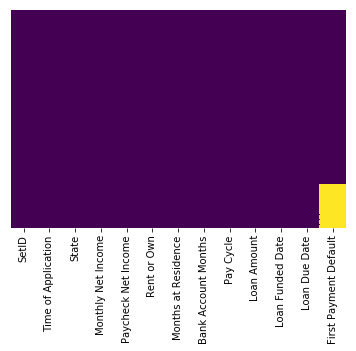

In [25]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
# yellow part shows the missing values. Here NAN is the people that 

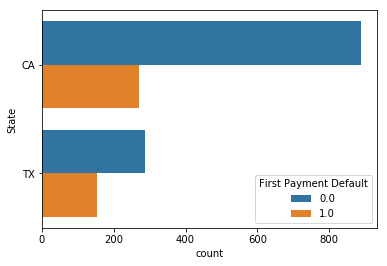

In [28]:
sns.countplot(data=df,y='State',hue='First Payment Default')

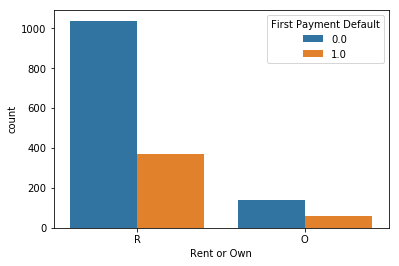

In [38]:
sns.countplot(data=df,x='Rent or Own',hue='First Payment Default')

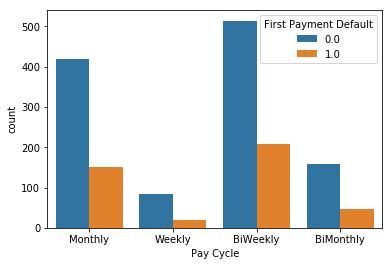

In [39]:
sns.countplot(data=df,x='Pay Cycle',hue='First Payment Default')

In [41]:
# let see skewness of data
skewness=df.skew()
print(skewness)
#+=show positive skew(righ),-=negative skew(left)

SetID                     0.000000
Monthly Net Income       22.542896
Paycheck Net Income      28.152319
Months at Residence       3.090130
Bank Account Months       6.358558
Loan Amount               0.860801
First Payment Default     1.062320
dtype: float64


<Figure size 720x648 with 0 Axes>

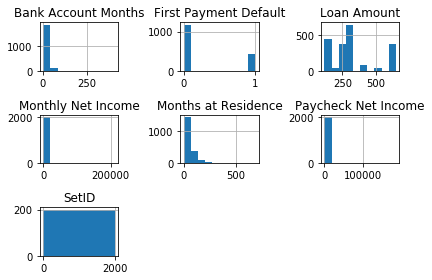

In [44]:
#Histograms
fig=plt.figure(figsize=(10,9))
df.hist()
plt.tight_layout()
plt.show()
# help to see possible outliers,gaussian,skewed or even exponetial

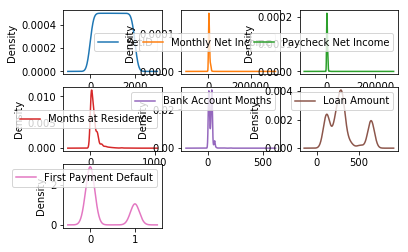

In [52]:
df.plot(kind='density',subplots=True,layout=(3,3),sharex=False)
plt.show()

SetID                       AxesSubplot(0.125,0.657941;0.227941x0.222059)
Monthly Net Income       AxesSubplot(0.398529,0.657941;0.227941x0.222059)
Paycheck Net Income      AxesSubplot(0.672059,0.657941;0.227941x0.222059)
Months at Residence         AxesSubplot(0.125,0.391471;0.227941x0.222059)
Bank Account Months      AxesSubplot(0.398529,0.391471;0.227941x0.222059)
Loan Amount              AxesSubplot(0.672059,0.391471;0.227941x0.222059)
First Payment Default          AxesSubplot(0.125,0.125;0.227941x0.222059)
dtype: object

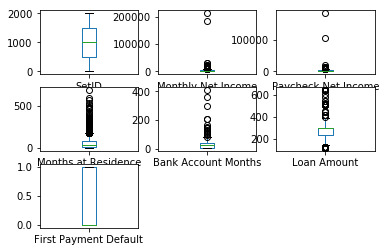

In [53]:
df.plot(kind='box',subplots=True,layout=(3,3),sharex=False,sharey=False)

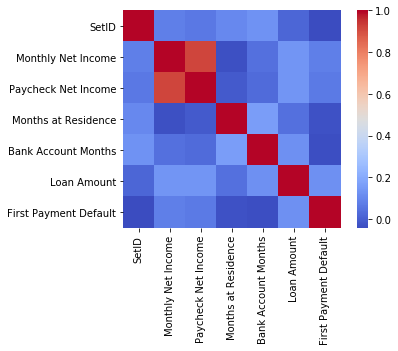

In [55]:
sns.heatmap(df.corr(),cmap='coolwarm',square=True)
plt.show()

C:\Users\minga\Anaconda3\lib\site-packages\numpy\lib\function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\minga\Anaconda3\lib\site-packages\numpy\lib\function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


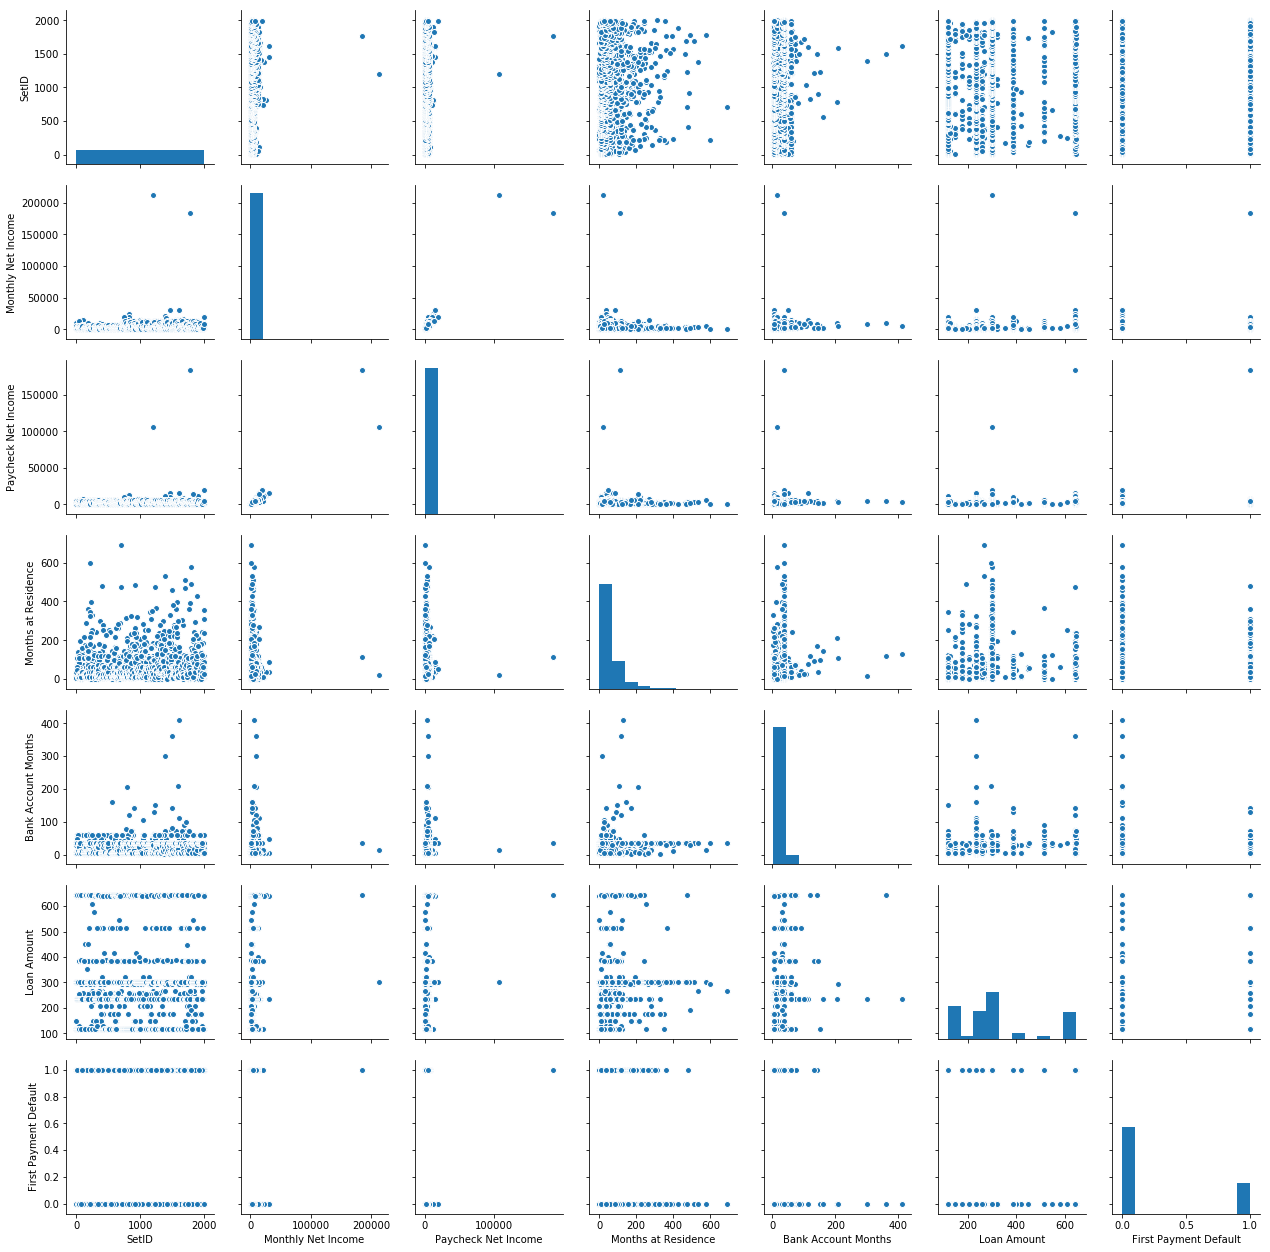

In [56]:
sns.pairplot(df)
plt.show()